In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt

In [14]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [15]:
# 데이터 불러오기
data = pd.read_csv('../data/merge/mackerel_price_trade.csv')
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,생산량,갈치,참조기,수입,수출,가격 (원)
date,,,,,,
2014-01-01,5663,2805,3,3476,4840,3422
2014-02-01,3565,1436,1,1101,3402,4073
2014-03-01,2620,2740,1,2011,2033,3891
2014-04-01,1525,2894,6,2454,2122,4259
2014-05-01,412,908,3,1995,755,3512
...,...,...,...,...,...,...
2022-08-01,3900,682,28,2056,613,3543
2022-09-01,5494,1809,10,2194,1996,3333
2022-10-01,5339,987,239,679,6242,3175


In [16]:
# 시계열 데이터 선택
ts_data = data['수출']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(50, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [17]:
# 미래 값 예측
forecast_steps = 24  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)
df=pd.DataFrame(forecast)
df.loc[df['predicted_mean']<0]=0
df

,predicted_mean
2023-01-01,15811.127838
2023-02-01,13329.337666
2023-03-01,10279.525740
2023-04-01,8017.295297
2023-05-01,7262.492549
2023-06-01,6036.068427
2023-07-01,3488.705560
2023-08-01,3945.606058
2023-09-01,3288.847434
2023-10-01,3387.035568


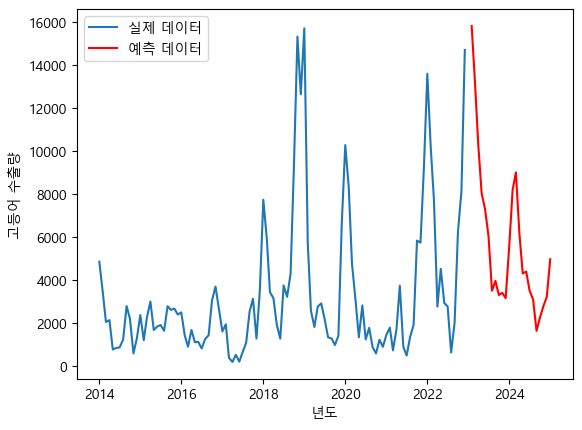

In [19]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, df['predicted_mean'], label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('고등어 수출량')
plt.show()

In [20]:
# 2024년 예측값 출력
print("2023~24년 예상 수온(30m) :", forecast)
df.rename(columns={'predicted_mean':'수출'}).to_csv('../data/pred/predict_수출.csv',encoding='utf-8-sig')

2023~24년 예상 수온(30m) : 2023-01-01    15811.127838
2023-02-01    13329.337666
2023-03-01    10279.525740
2023-04-01     8017.295297
2023-05-01     7262.492549
2023-06-01     6036.068427
2023-07-01     3488.705560
2023-08-01     3945.606058
2023-09-01     3288.847434
2023-10-01     3387.035568
2023-11-01     3143.575602
2023-12-01     5498.312221
2024-01-01     8178.081052
2024-02-01     8994.719573
2024-03-01     6168.885166
2024-04-01     4294.083087
2024-05-01     4379.832152
2024-06-01     3494.194524
2024-07-01     3087.074468
2024-08-01     1620.192152
2024-09-01     2233.159343
2024-10-01     2765.918717
2024-11-01     3195.951992
2024-12-01     4955.507842
Freq: MS, Name: predicted_mean, dtype: float64
